In [1]:
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

2023-02-10 12:32:38.843202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


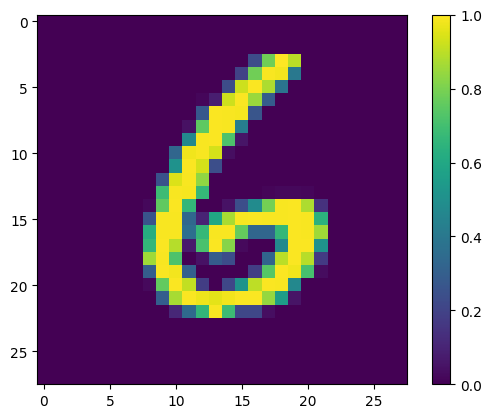

In [2]:
from matplotlib import pyplot as plt

plt.imshow(x_train[6000])
plt.colorbar()

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
inputs = Input(shape=x_train.shape[1:])
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
outputs = Dense(10, activation='softmax')(x)
net = Model(inputs=inputs, outputs=outputs)

2023-02-10 12:32:45.261802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0     

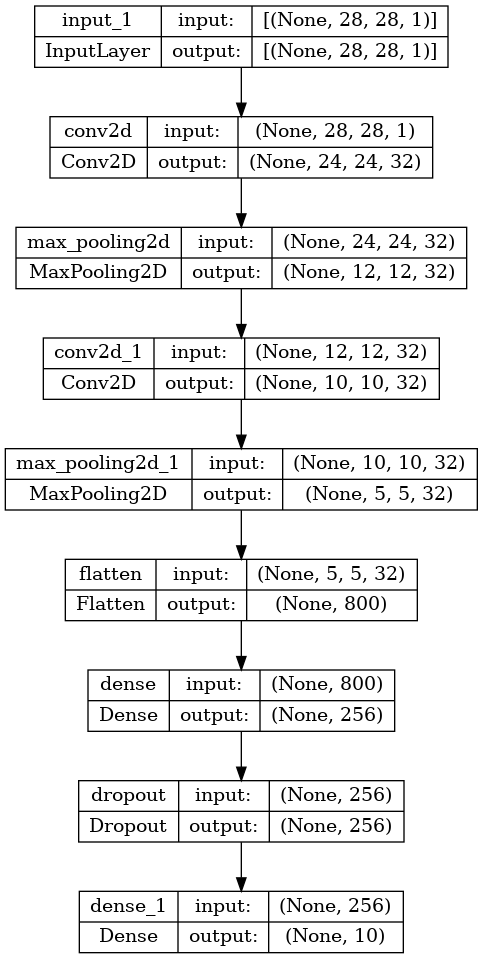

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(net, to_file='network_structure.png', show_shapes=True)

Epoch 1/20
235/235 [==============================] - 14s 56ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0230 - val_accuracy: 0.9936
Epoch 2/20
235/235 [==============================] - 13s 56ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0224 - val_accuracy: 0.9934
Epoch 3/20
235/235 [==============================] - 13s 54ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.0223 - val_accuracy: 0.9936
Epoch 4/20
235/235 [==============================] - 13s 56ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0253 - val_accuracy: 0.9928
Epoch 5/20
235/235 [==============================] - 13s 57ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0216 - val_accuracy: 0.9942
Epoch 6/20
235/235 [==============================] - 14s 59ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0234 - val_accuracy: 0.9935
Epoch 7/20
235/235 [==============================] - 14s 58ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.0268 - val_accuracy:

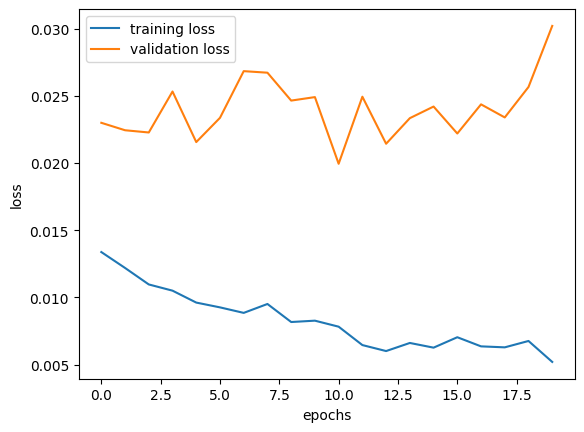

In [8]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = net.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=20,batch_size=256,callbacks=[tensorboard_callback])

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
%tensorboard --logdir logs/fit